In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
df = pd.read_csv('Iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# to display stats of data
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# to display basic info about the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# to display no of samples on each class
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [8]:
# check for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

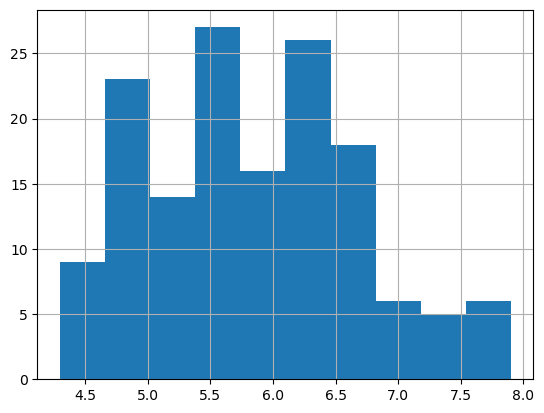

In [9]:
# Exploratory data analysis
# Historgrams

df['sepal_length'].hist()

<AxesSubplot:>

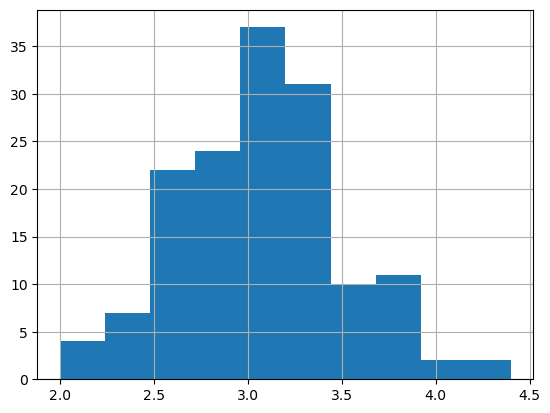

In [10]:
df['sepal_width'].hist()

<AxesSubplot:>

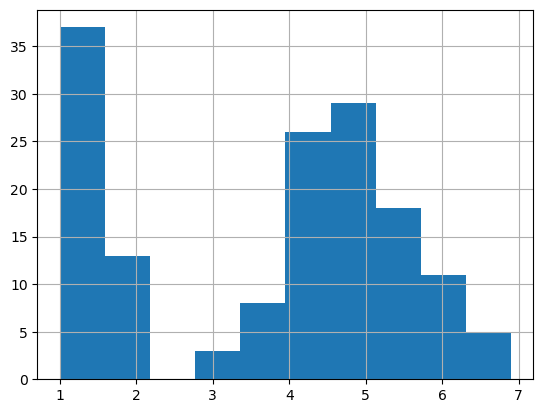

In [11]:
df['petal_length'].hist()

<AxesSubplot:>

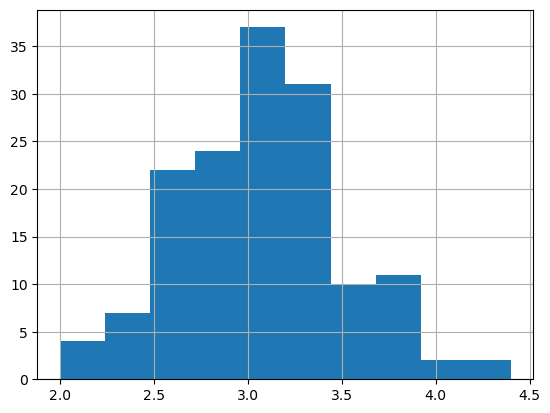

In [12]:
df['sepal_width'].hist()

In [18]:
#ScatterPlots
colors = ['red', 'orange', 'blue']
Species = ['virginica', 'versicolor', 'setosa']

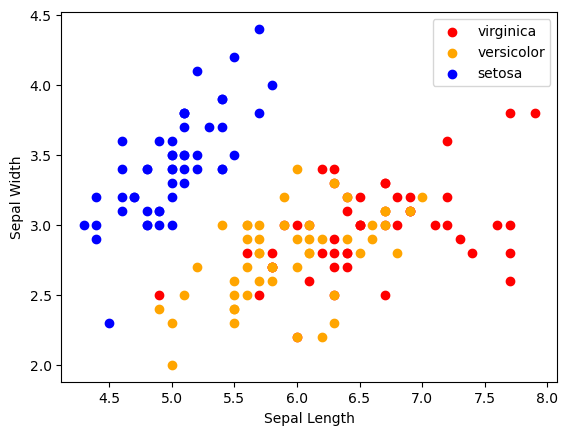

In [20]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label= Species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

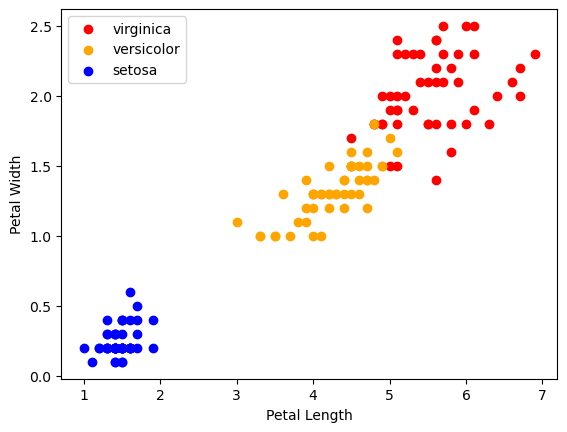

In [21]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label= Species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

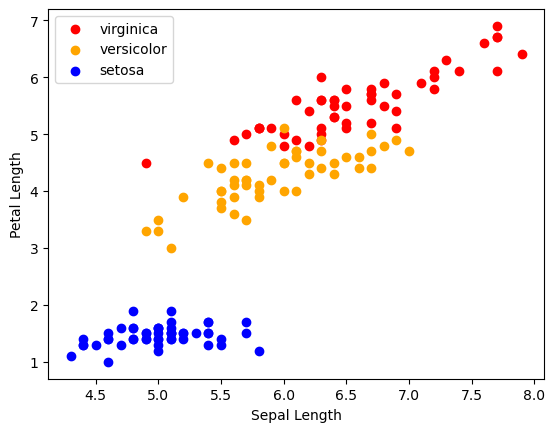

In [22]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label= Species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

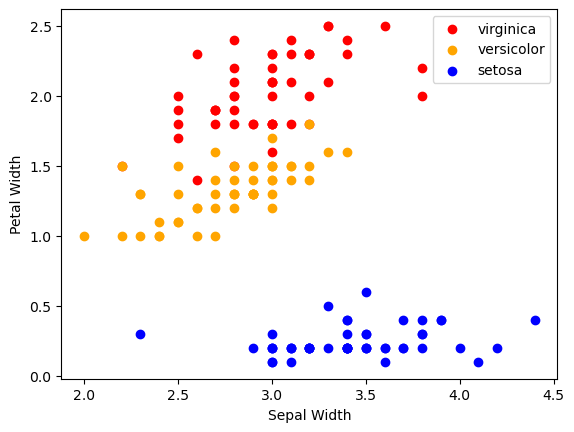

In [23]:
for i in range(3):
    x = df[df['species'] == Species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label= Species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

In [24]:
# Correlation matrix

df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

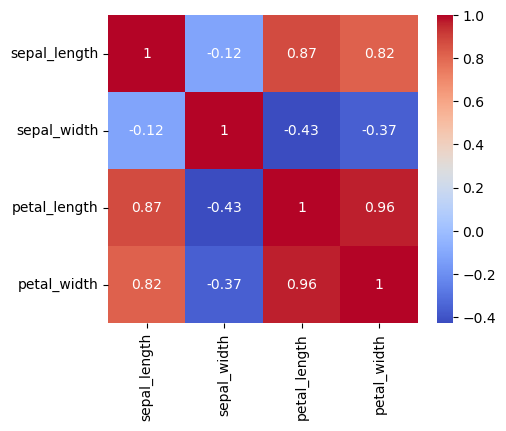

In [26]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = "coolwarm")

In [28]:
# Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
# Model Training
from sklearn.model_selection import train_test_split

#training - 70 testing - 30

X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [68]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [69]:
model.fit(x_train, y_train)

LogisticRegression()

In [70]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [49]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [50]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


C:\Users\yashh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()


In [53]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
# print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777
